In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import klib as k
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor,GradientBoostingRegressor,RandomForestRegressor

In [2]:
df=pd.read_csv('Concrete_Data.csv')
df.head(5)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

In [4]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
df.isnull().mean()*100

cement              0.0
slag                0.0
flyash              0.0
water               0.0
superplasticizer    0.0
coarseaggregate     0.0
fineaggregate       0.0
age                 0.0
csMPa               0.0
dtype: float64

# plotting

#### univariant

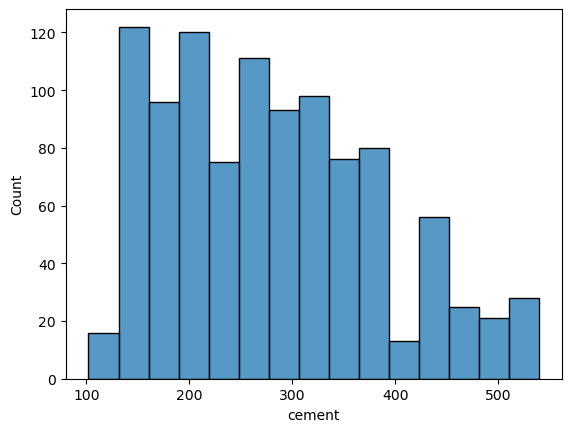

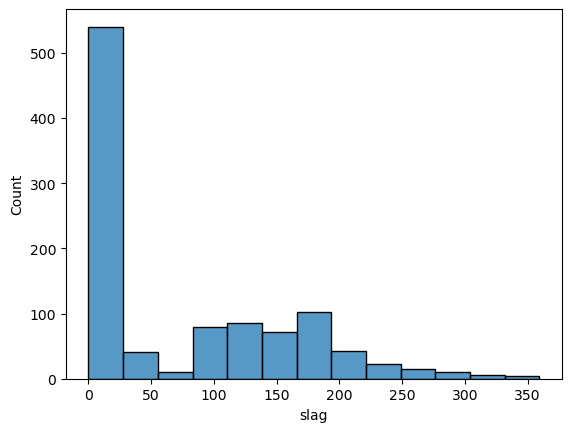

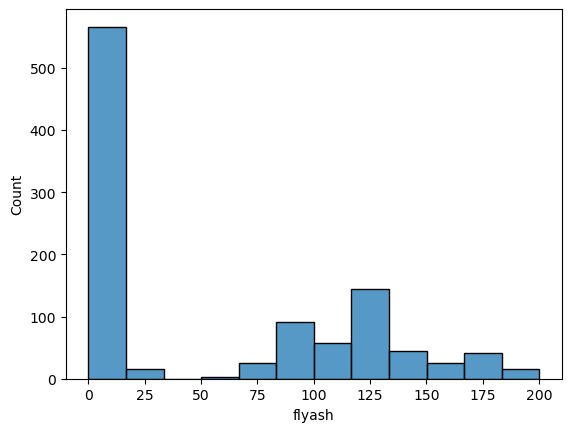

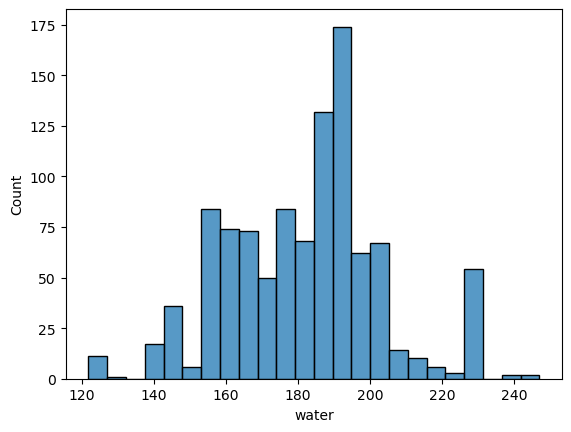

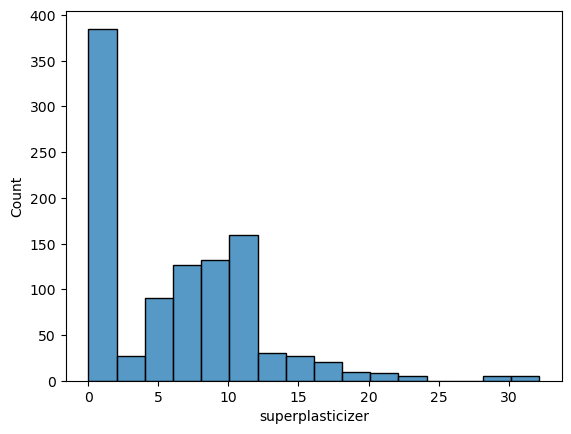

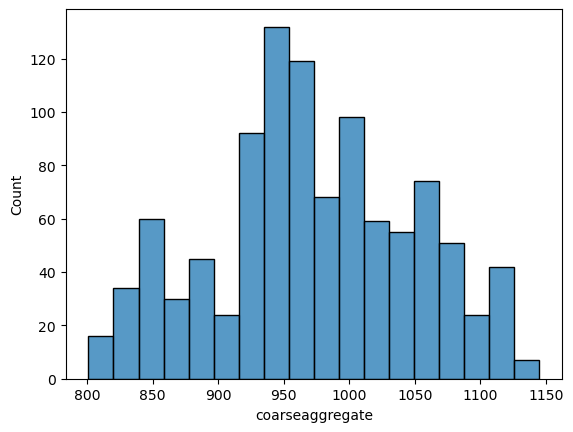

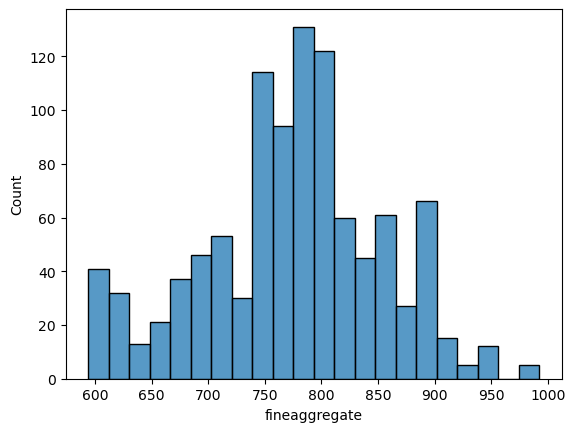

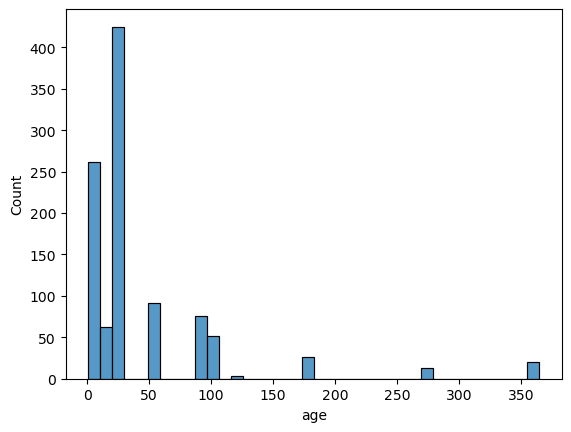

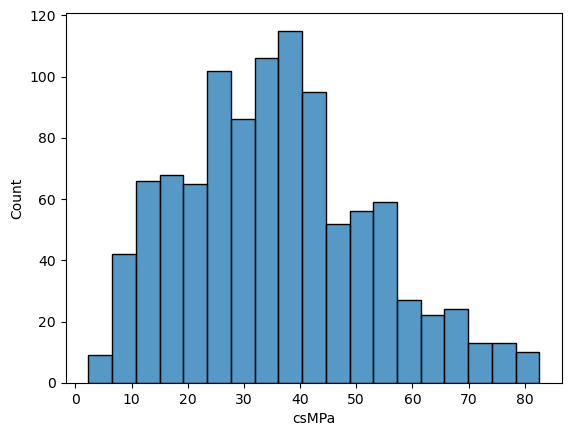

In [7]:
for i in df.columns:
    if df[i].dtypes!="object":
        sns.histplot(x=df[i])
        plt.show()

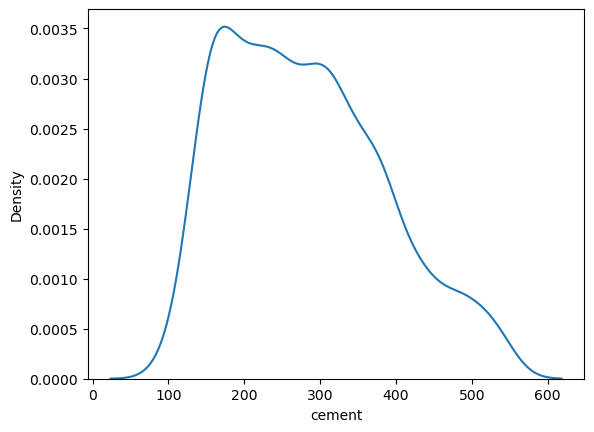

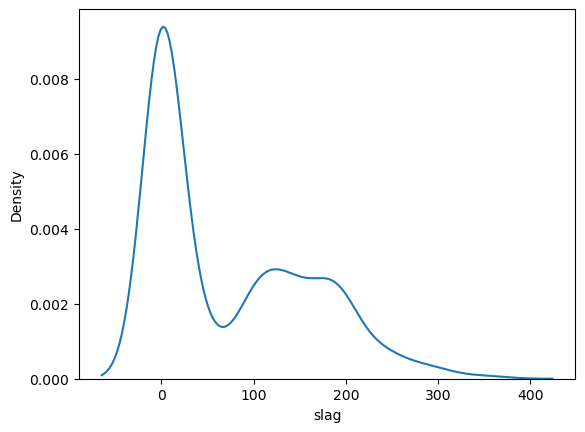

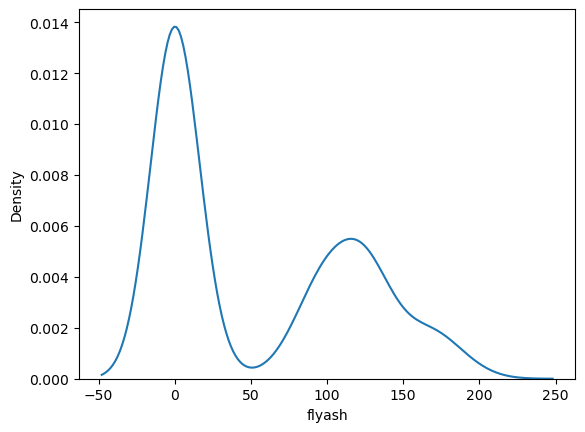

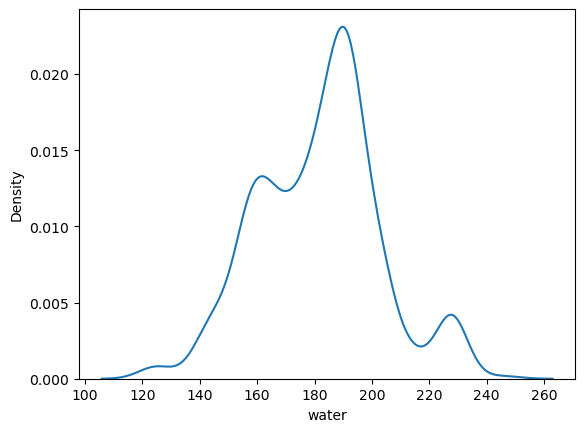

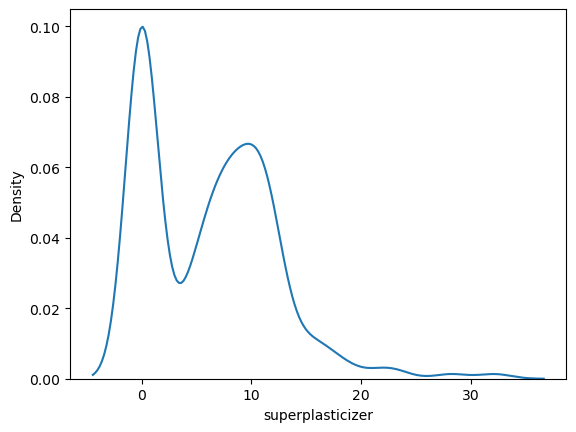

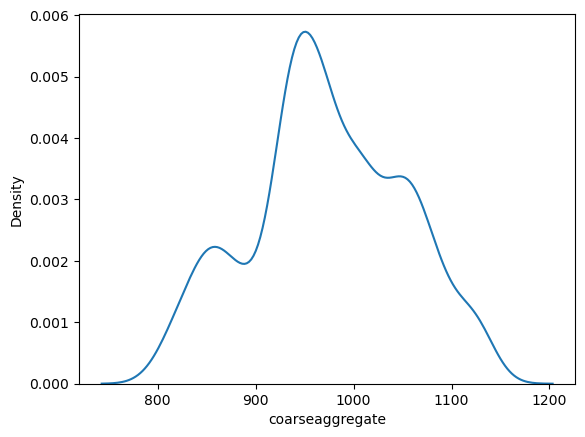

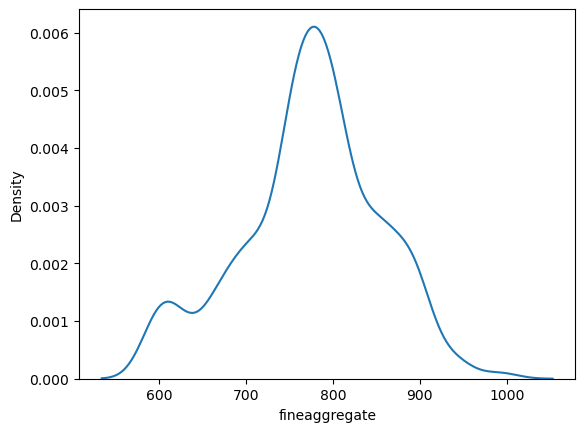

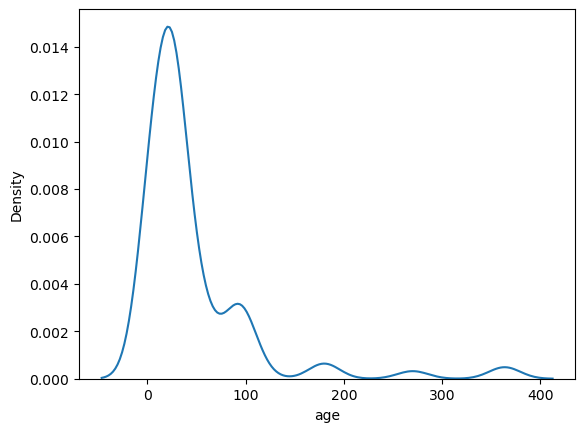

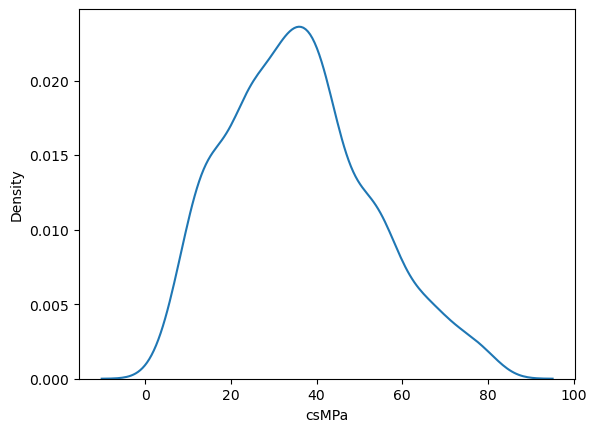

In [8]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.kdeplot(x=df[i])
        plt.show()

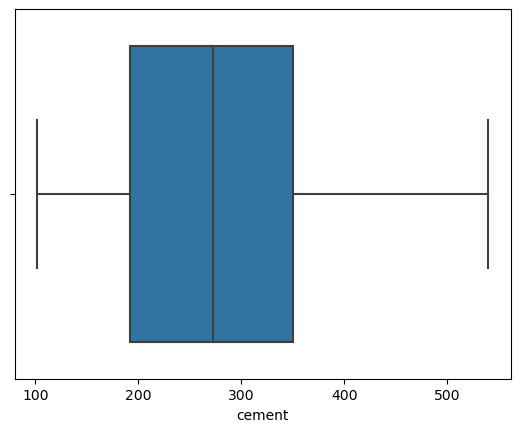

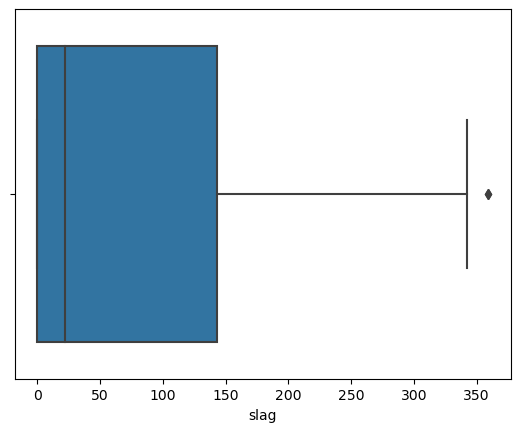

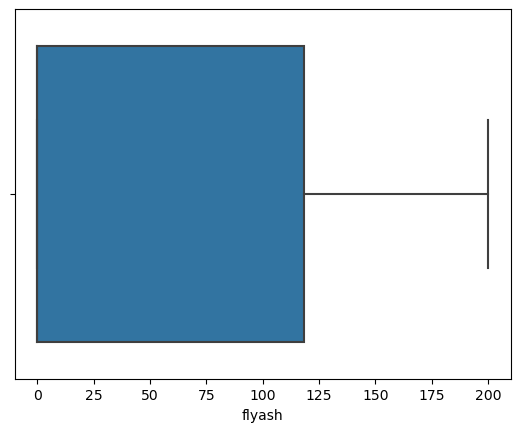

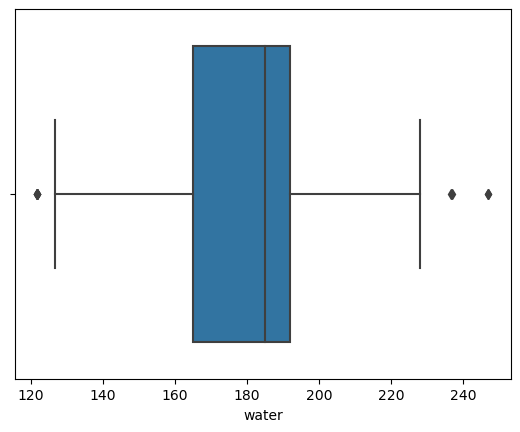

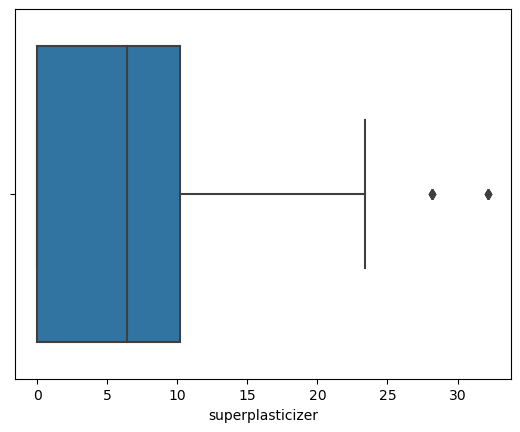

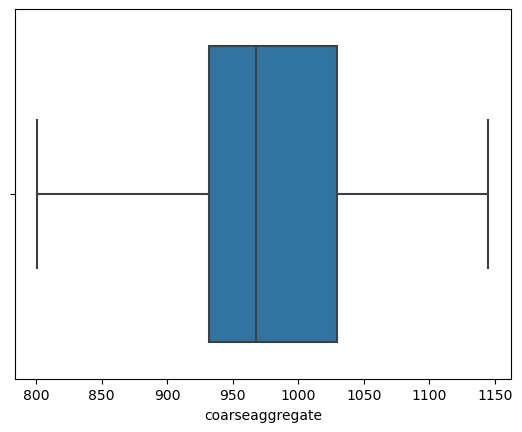

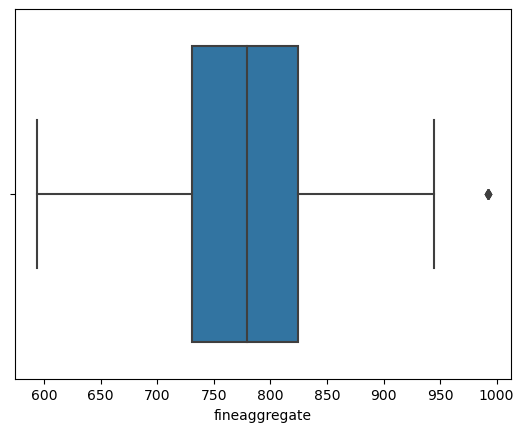

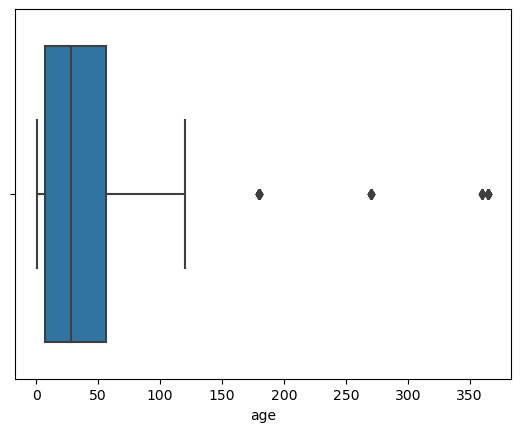

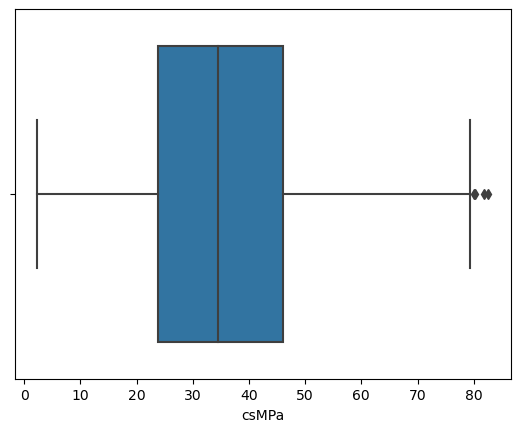

In [9]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.boxplot(x=df[i])
        plt.show()

### Treating Outlier

In [10]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [11]:
for i in df.columns:
    if df[i].dtypes !='object':
        UL,LL=outlier_limit(df[i])
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

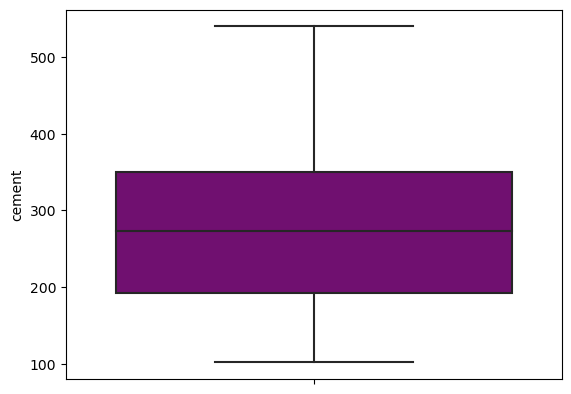

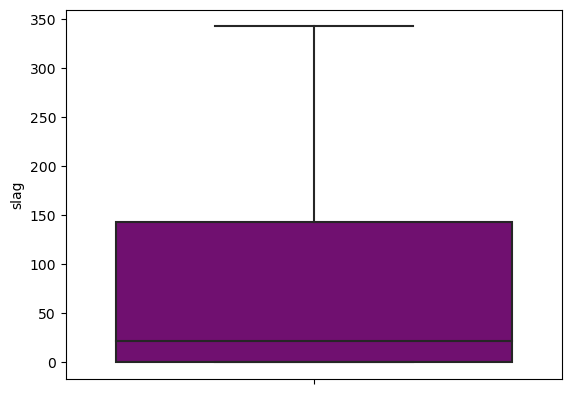

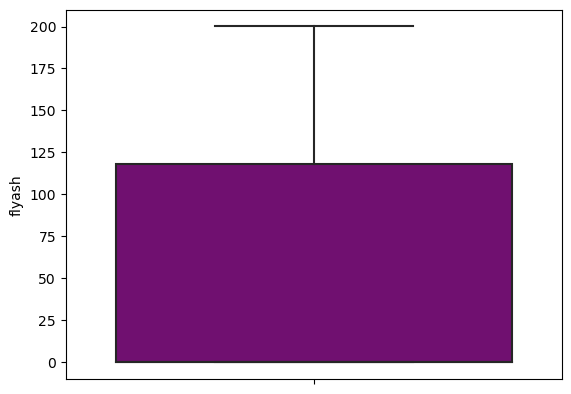

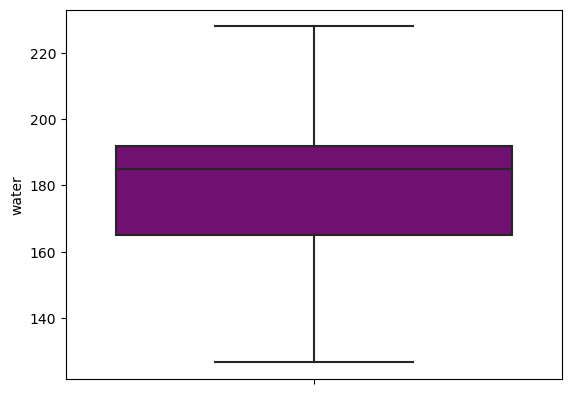

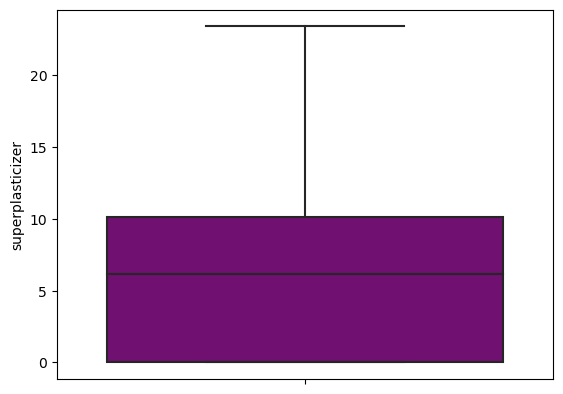

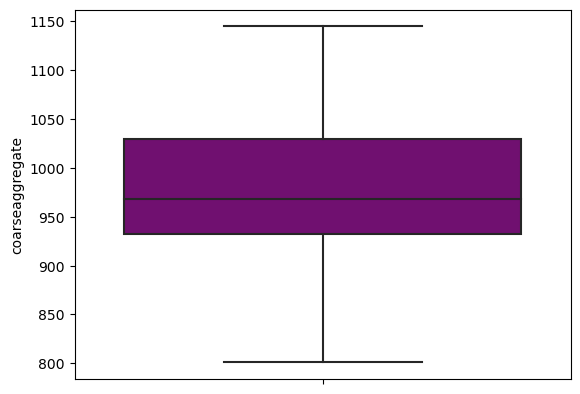

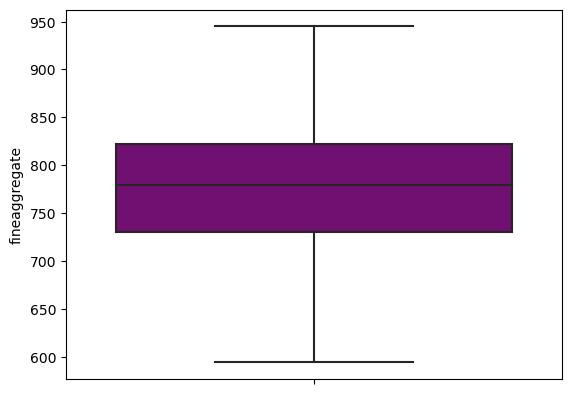

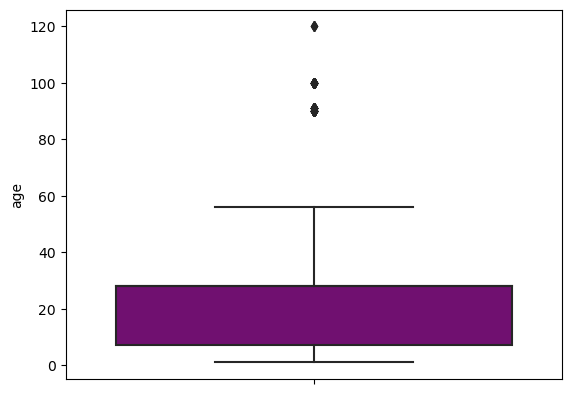

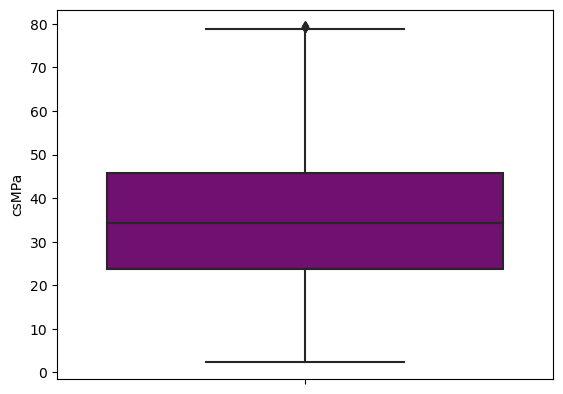

In [12]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i], color='purple')
        plt.show()

In [13]:
df.isnull().sum()

cement               0
slag                 2
flyash               0
water                9
superplasticizer    10
coarseaggregate      0
fineaggregate        5
age                 59
csMPa                4
dtype: int64

In [14]:
a=['slag','water','superplasticizer','fineaggregate','age','csMPa']
for i in a:
    mean1=df[i].mean()
    df[i].fillna(value=mean1,inplace=True)

In [15]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [16]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

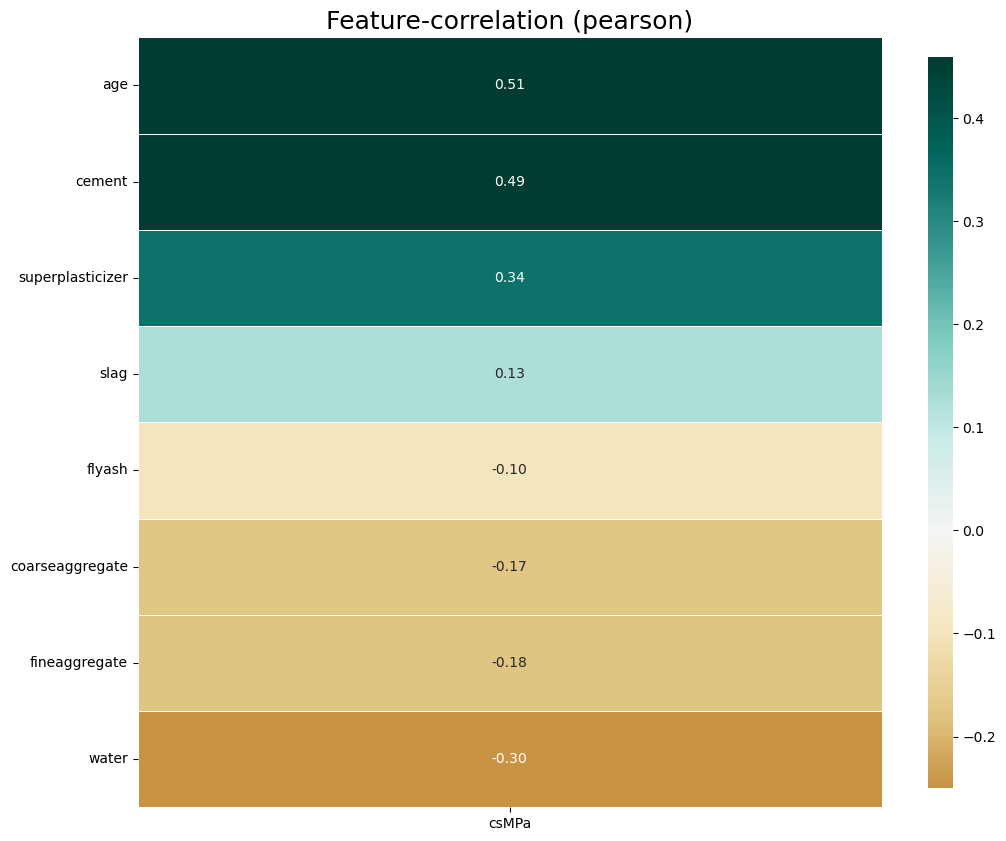

In [17]:
k.corr_plot(data=df,target='csMPa');

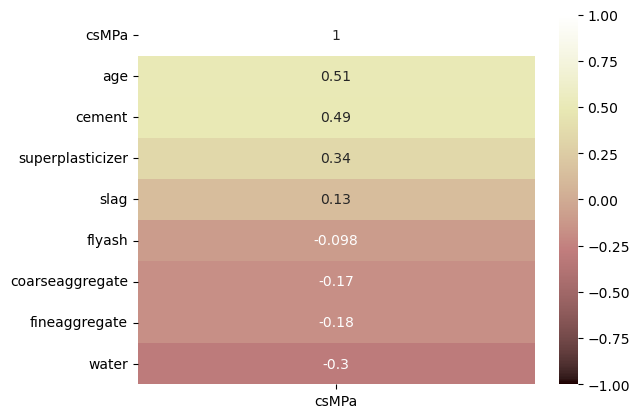

In [18]:
sns.heatmap(df.corr()[['csMPa']].sort_values(by='csMPa',ascending=False),vmin=-1,vmax=1,annot=True,cmap='pink');

In [19]:
df.corr()['csMPa']

cement              0.493823
slag                0.129641
flyash             -0.098213
water              -0.299701
superplasticizer    0.341897
coarseaggregate    -0.173085
fineaggregate      -0.176744
age                 0.505083
csMPa               1.000000
Name: csMPa, dtype: float64

In [20]:
x=df[['age','cement','slag','superplasticizer']].values

In [21]:
y=df[['csMPa']].values

#### feature scaling

In [22]:
sc=StandardScaler()

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### model building

In [24]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'LinearSVR':LinearSVR(),
    'Lasso':Lasso(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'BaggingRegressor':BaggingRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor(),
    'HistGradientBoostingRegressor':HistGradientBoostingRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),

}

In [25]:
for name,model in models.items():
    model.fit(x_train,y_train)
    print('model trained with {}'.format(name))
    training_score =model.score(x_train, y_train)*100
    testing_score =model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print('r2score:',score)
    print('training_score:',training_score)
    print('testing_score:',testing_score)
    print('mae:',mae)
    print('mse:',mse)
    print('rmse_test:',rmse)
    print('*'*100)

model trained with LinearRegression
r2score: 68.38840215450534
training_score: 68.49351761124545
testing_score: 68.38840215450534
mae: 6.980155731844471
mse: 83.25851345709661
rmse_test: 9.124610318095597
****************************************************************************************************
model trained with Ridge
r2score: 68.38853467244579
training_score: 68.49351759642654
testing_score: 68.38853467244579
mae: 6.980148769870618
mse: 83.25816443181854
rmse_test: 9.12459119258603
****************************************************************************************************
model trained with LinearSVR
r2score: 67.42796587222203
training_score: 65.11074551559271
testing_score: 67.42796587222203
mae: 7.2336595262125565
mse: 85.78810710573167
rmse_test: 9.26218695048484
****************************************************************************************************
model trained with Lasso
r2score: 68.47628758639641
training_score: 68.48107295382783
testing_score: 

In [26]:
model = Lasso()

In [27]:
model.fit(x_train,y_train)

Lasso()

In [29]:
y_pred = model.predict(x_test)
y_pred

array([36.76578466, 14.61590668, 71.60069173, 46.21910839, 19.38948962,
       49.57698694, 45.94703672, 21.13520082, 50.00859448, 33.66111098,
       20.92299214, 48.15054281, 35.19452386, 26.86536142, 52.78747605,
       59.32659255, 28.79926809, 45.92063031, 41.5276204 , 33.8452907 ,
       53.84810838, 23.70147943, 21.52018249, 40.32861793, 22.37739155,
       26.44538372, 53.26135116, 19.33441182, 59.32659255, 61.25064842,
       21.99184213, 53.31350936, 22.94856114, 31.04446375, 23.6243832 ,
       14.11547024, 48.37798447, 22.06319195, 28.54888228, 23.62485846,
       48.95408658, 48.50368444, 33.65980015, 28.90131769, 43.69429974,
       50.44879836, 29.05770394, 38.99255545, 34.15889976, 31.13452447,
       37.84079421, 26.62352538, 30.22486994, 48.38355102, 50.48336214,
       44.70490425, 30.26396005, 49.79674549, 66.33558108, 39.06032623,
       33.74919193, 20.37501445, 42.29314242, 52.53037349, 18.51023687,
       42.36239478, 33.59301035, 28.53298334, 22.32836795, 19.79

In [30]:
PREDICTION = pd.DataFrame(zip(y_test, y_pred), columns=('ACTUAL', 'PREDICTED'), dtype=float)
PREDICTION

,ACTUAL,PREDICTED
0,26.06,36.765785
1,10.35,14.615907
2,79.30,71.600692
3,74.99,46.219108
4,9.69,19.389490
...,...,...
201,27.53,27.068880
202,33.76,41.206491
203,33.01,19.462460
204,33.72,33.629831
